In [1]:
import os
import bmi.wrapper
import cmocean.cm
import matplotlib.colors
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
delft3d = bmi.wrapper.BMIWrapper('dflowfm')

In [3]:
delft3d.initialize(os.path.expanduser('~/models/Zandmotor/zm_tide.mdu'))

In [4]:
delft3d.get_start_time(), delft3d.get_current_time(), delft3d.get_end_time(), delft3d.get_time_step()

(28771200.0, 28771200.0, 29116800.0, 6.0)

In [5]:
for i in range(delft3d.get_var_count()):
    print(delft3d.get_var_name(i))

b'DFM_COMM_DFMWORLD'
b'iglobal_s'
b'Uorb'
b'twav'
b'shx'
b'shy'
b'shi'
b'zsp'
b'shL'
b'shB'
b'shd'
b'stuw'
b'fstuw'
b'stuwmx'
b'roer'
b'froer'
b'roermx'
b'wx'
b'wy'
b'rain'
b's0'
b's1'
b'a0'
b'a1'
b'vol0'
b'vol1'
b'hs'
b'ucx'
b'ucy'
b'ucz'
b'sa0'
b'sa1'
b'satop'
b'tem0'
b'tem1'
b'u1'
b'frcu'
b'viusp'
b'diusp'
b'kfs'
b'kfst0'
b'ba'
b'bl'
b'ln'
b'lncn'
b'iadv'
b'bob'
b'vort'
b'xzw'
b'yzw'
b'xk'
b'yk'
b'zk'
b'kn'
b'zbnd1d2d1'
b'zbnd1d2d0'
b'zcrest1d2d'
b'edgenumbers1d2d'
b'kbnd1d2d'
b'width_1d'
b'qzeta_1d2d'
b'qlat_1d2d'
b'qtotal_1d2d'
b'\xd0!\xe6[\xff\x7f'
b'pumps'
b'weirs'
b'gates'
b'sourcesinks'
b'observations'
b'crosssections'
b'uabs'
b'sed1'
b'netelemnode'
b'flowelemnode'


In [6]:
data = {
    'bl': delft3d.get_var('bl'),
    'xzw': delft3d.get_var('xzw'), 
    'yzw': delft3d.get_var('yzw'),
    's1': delft3d.get_var('s1'),
    's0': delft3d.get_var('s1').copy()
}

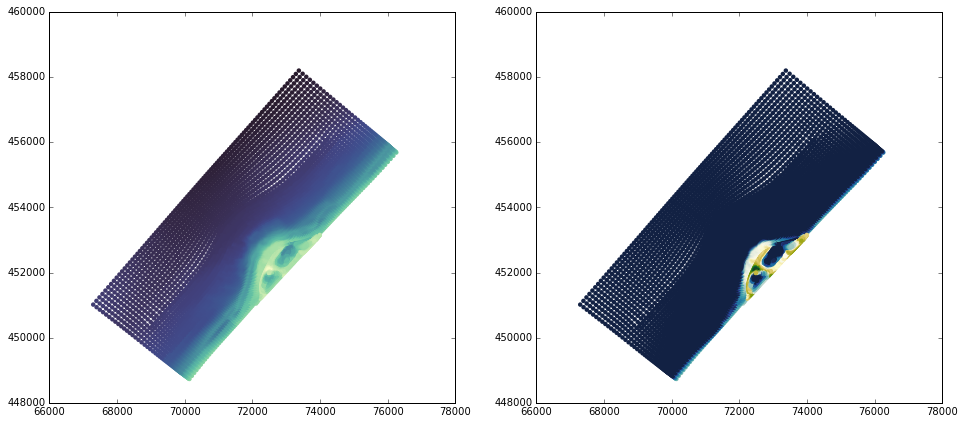

In [7]:


fig, axes = plt.subplots(1, 2, figsize=(16, 7))
N = matplotlib.colors.Normalize(data['bl'].min(), data['bl'].max())
cmap = cmocean.cm.deep_r
axes[0].scatter(data['xzw'], data['yzw'], c=cmap(N(data['bl'])), edgecolor='none')
N = matplotlib.colors.Normalize(data['s1'].min(), data['s1'].max())
cmap = cmocean.cm.delta
axes[1].scatter(data['xzw'], data['yzw'], c=cmap(N(data['s1'])), edgecolor='none')

In [8]:
for i in range(10):
    delft3d.update(60)

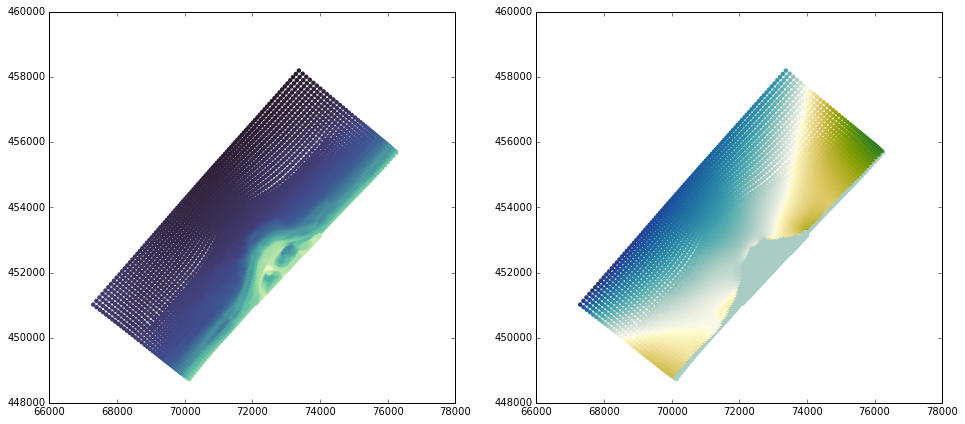

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
N = matplotlib.colors.Normalize(data['bl'].min(), data['bl'].max())
cmap = cmocean.cm.deep_r
axes[0].scatter(data['xzw'], data['yzw'], c=cmap(N(data['bl'])), edgecolor='none')
var = data['s1'] - data['s0']
N = matplotlib.colors.Normalize(var.min(), var.max())
cmap = cmocean.cm.delta
axes[1].scatter(data['xzw'], data['yzw'], c=cmap(N(var)), edgecolor='none')


In [10]:
import numpy as np
in_box = np.logical_and.reduce([
        data['xzw'] > 70000,
        data['xzw'] < 72000, 
        data['yzw'] > 451000,
        data['yzw'] < 452000
])
data['bl'][in_box] += 4

/Users/baart_f/.virtualenvs/main/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 24356 but corresponding boolean dimension is 24116


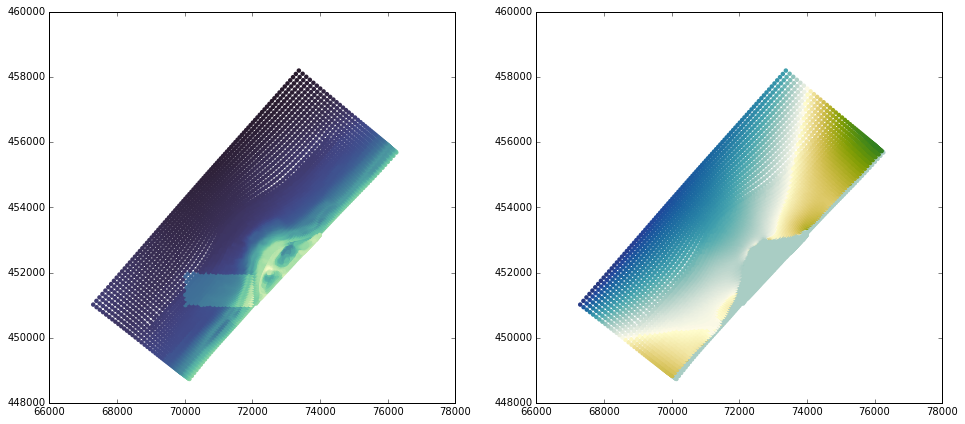

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
N = matplotlib.colors.Normalize(data['bl'].min(), data['bl'].max())
cmap = cmocean.cm.deep_r
axes[0].scatter(data['xzw'], data['yzw'], c=cmap(N(data['bl'])), edgecolor='none')
var = data['s1'] - data['s0']
N = matplotlib.colors.Normalize(var.min(), var.max())
cmap = cmocean.cm.delta
axes[1].scatter(data['xzw'], data['yzw'], c=cmap(N(var)), edgecolor='none')


In [12]:
for i in range(10):
    delft3d.update(60)

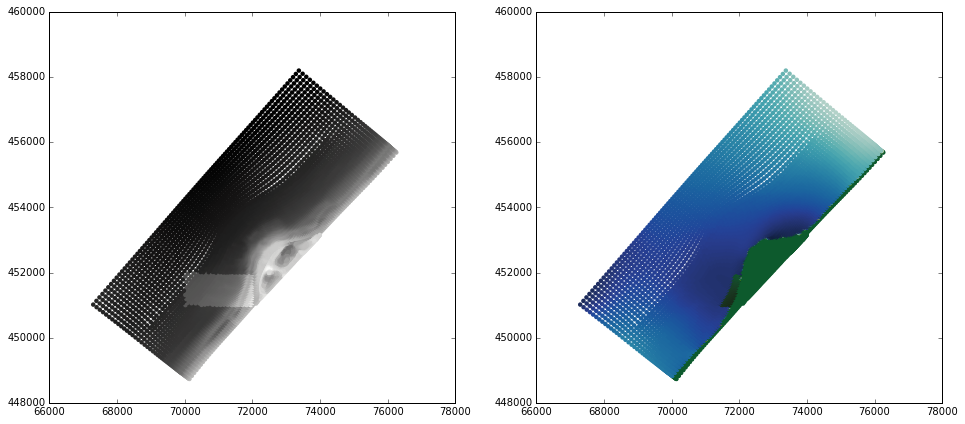

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
N = matplotlib.colors.Normalize(data['bl'].min(), data['bl'].max())
cmap = cmocean.cm.gray
axes[0].scatter(data['xzw'], data['yzw'], c=cmap(N(data['bl'])), edgecolor='none')
var = data['s1'] - data['s0']
N = matplotlib.colors.Normalize(var.min(), var.max())
cmap = cmocean.cm.delta
axes[1].scatter(data['xzw'], data['yzw'], c=cmap(N(var)), edgecolor='none')


In [ ]:
# TODO: 
# convert coordinates from model to sandbox: matplotlib.transforms.BboxTransform -> Project 2d
# sketch black & white zandmotor
# Apply bathymetry based on sandbox output -> project z
# run FM continuously
# Export bathymetryTextureObjects from Sandbox to input for fm -> export
# visualize resulting ucx, ucy, and s1
